# Classification paraphrases to find similarities
We want to highest precision (no False positive is important)

In [1]:
import pandas as pd
import secrets, os
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
import sklearn
print("sklearn ver.", sklearn.__version__)
import sklearn. metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

sklearn ver. 1.0.2


In [2]:
ontologyName="Allotrope"

df = pd.read_pickle("Embedded_"+ontologyName+"_SurroundingTexts.pkl")
display(df.info())

tr, tst = train_test_split(df[['EmbD1','EmbD2','EmbD3','EmbPD1','EmbPD2','EmbPD3']], test_size=0.2, shuffle=True)
tr = tr.reset_index().drop(['index'], axis=1)
tst= tst.reset_index().drop(['index'], axis=1)
display(tr.head())
print(tr.shape, tst.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Index         2893 non-null   int64 
 1   TextD1        2886 non-null   object
 2   TextD2        2888 non-null   object
 3   TextD3        2892 non-null   object
 4   ParaphraseD1  2886 non-null   object
 5   ParaphraseD2  2888 non-null   object
 6   ParaphraseD3  2892 non-null   object
 7   Dataset       2893 non-null   object
 8   EmbD1         2893 non-null   object
 9   EmbD2         2893 non-null   object
 10  EmbD3         2893 non-null   object
 11  EmbPD1        2893 non-null   object
 12  EmbPD2        2893 non-null   object
 13  EmbPD3        2893 non-null   object
 14  EmbLens       2893 non-null   int64 
dtypes: int64(2), object(13)
memory usage: 339.1+ KB


None

EmbD1  \
0  [-1.996316, -0.065973654, -0.3678812, 0.296575...   
1  [-1.6197522, 0.2800387, -1.1437852, 2.36696, 5...   
2  [-1.6228551, -0.3704717, -0.8130032, 0.7982484...   
3  [-0.74682194, 1.0300609, -0.82841516, -1.24010...   
4  [-0.55252767, -0.9313904, -0.35745206, 0.72872...   

                                               EmbD2  \
0  [-1.0824364, -0.7251995, 0.21260175, 0.4585210...   
1  [-0.8524347, -0.53499824, -0.9646636, 1.701668...   
2  [-1.4602942, -0.9375826, -0.77686405, 0.433307...   
3  [-2.3624618, 0.25702557, -0.45063323, 0.089083...   
4  [-1.3042021, 0.01492232, -0.84704375, 0.583879...   

                                               EmbD3  \
0  [-1.0199945, -0.9053024, 0.14056519, 0.2505061...   
1  [-1.4599354, -0.28307986, 0.043848697, 0.93847...   
2  [-0.88616556, -0.7416625, -0.029290702, -0.009...   
3  [-1.7210808, -0.10063036, -0.5590359, -0.19109...   
4  [-1.7855222, -0.19948617, -0.86174303, 0.56367...   

                                              EmbPD1  \
0  [-1.8705665, -0.004703271, -0.21032777, 0.2352...   
1  [-2.2539434, 0.49893707, -1.5171453, 2.7565043...   
2  [-3.3477654, 0.10799523, -1.8402972, 1.5088913...   
3  [-0.7148258, 1.287185, -0.51929826, -1.1039883...   
4  [-0.34129187, -0.61317986, 0.016643625, 0.7070...   

                                              EmbPD2  \
0  [-0.54369843, -1.1238613, 0.56872374, 0.882270...   
1  [-1.2909123, -0.06511296, -1.3429902, 2.097414...   
2  [-1.2716734, -1.2175714, -0.5196538, 0.4391874...   
3  [-2.6353002, 0.45837405, -0.7046095, 0.0305509...   
4  [-1.5871463, 0.12829785, -1.0186725, 0.8299224...   

                                              EmbPD3  
0  [-1.4528021, -0.42526853, -0.10284011, 0.24728...  
1  [-1.5138984, 0.0015829063, -0.48277757, 1.1378...  
2  [-1.5334598, -0.2754475, -0.07375583, 0.269793...  
3  [-1.9587532, 0.122416176, -0.55632937, -0.0937...  
4  [-2.0822997, 0.27018824, -1.075035, 0.6932541,...

(2314, 6) (579, 6)


In [3]:
print(tr.shape, tst.shape)
str(tr.iat[tr.shape[0]-1,tr.shape[1]-1])

#list(tr.iat[tr.shape[0]-1,tr.shape[1]-1])


(2314, 6) (579, 6)


'[-2.1129196  -0.5640189  -1.5251884   0.78812164  5.26575    -0.03015328\n  0.7978615   3.4806662  -0.5189974  -1.031034    7.1885266   1.5335824\n -2.9028745   1.8135113   1.0988823   2.0658612   1.2461898   1.4439176\n -1.6365514  -2.3093092   0.9702436   0.11268868 -1.7809829   0.5019075\n -1.2871132  -1.9207885  -0.836657   -1.4666612  -0.6935273   0.99609405\n  0.7804631  -0.9733172  -0.6617763  -1.4320192  -2.1918955  -1.1043139\n  0.5412524   0.7832207   2.652134    1.4562052   0.4364672  -0.9219704\n -0.97805357  0.9375212  -1.9607261   0.8203404   1.9310275  -0.7729697\n -0.4620953  -0.35142443 -1.3969827   2.3857644  -0.2135165  -4.276843\n -1.0713644   1.3013843   0.4429036   1.1052259   0.85693276 -1.06925\n  1.2260699  -0.5736188  -1.471438   -0.8038003   0.8786435   1.8004186\n -3.2860005  -3.7960095   0.875274    2.3300416  -0.9957456  -0.26682657\n -3.0952182  -0.07835561 -0.8504894   1.2660903  -3.6365411   2.3795667\n -3.2470605   0.4178303  -4.6802764  -0.5189957   

In [4]:
def generateDataset(size, df):
    dfn=pd.DataFrame()
    for i in tqdm(range(size)):
        r=secrets.randbelow(df.shape[0])
        r2=secrets.randbelow(df.shape[0])
        s=secrets.randbelow(df.shape[1])
        s2=secrets.randbelow(df.shape[1])
        similar = secrets.randbelow(2)
        if similar or r==r2:
            val = pd.DataFrame(index=[0])
            val['Target'] = 1
            val['A'] = [df.iat[r,s]]
            val['B'] = [df.iat[r,s2]]
        else:
            val = pd.DataFrame(index=[0])
            val['Target'] = 0
            val['A'] = [df.iat[r,s]]
            val['B'] = [df.iat[r2,s2]]
        dfn=pd.concat([dfn, val], ignore_index=True)
    dfn['Diff'] = dfn['A']-dfn['B']
    return dfn

import psutil
print("Size of the array: ", np.array(tr.iat[0,0]).size)
print("Memory size of one array element [B]: ", np.array(tr.iat[0,0]).itemsize)
print("Memory size of numpy array [B]:", np.array(tr.iat[0,0]).size * np.array(tr.iat[0,0]).itemsize)
print("Total memory [B]:", psutil.virtual_memory().total)
maxExamples = int(pow(psutil.virtual_memory().total / np.array(tr.iat[0,0]).size / np.array(tr.iat[0,0]).itemsize, 1/2))

#for algorithms that need N^2 memory space (gaussian process)
dftrUS=generateDataset(min(maxExamples, 2*tr.shape[0]*(tr.shape[1]-1)), tr)
display(dftrUS.head(3))

dftr=generateDataset(2*tr.shape[0]*(tr.shape[1]-1), tr)
display(dftr.head(3))

dftst=generateDataset(2*tst.shape[0]*(tst.shape[1]-1), tst)
display(dftst.head(3))

display(dftst.describe())

print(dftr.shape, dftrUS.shape, dftst.shape)

Size of the array:  300
Memory size of one array element [B]:  4
Memory size of numpy array [B]: 1200
Total memory [B]: 34237681664


100%|██████████| 10682/10682 [00:19<00:00, 538.01it/s]


Target                                                  A  \
0       0  [-1.5682247, -1.243765, -0.83527285, 0.8337182...   
1       0  [-1.8934112, -0.5374413, -0.7723976, 0.3964832...   
2       0  [-2.5850894, -1.5778055, -0.54971707, 0.083287...   

                                                   B  \
0  [-0.7252612, 1.2546967, -0.37805212, 0.4839333...   
1  [-1.7041787, 0.42846283, -0.98885244, 0.421602...   
2  [-2.0814495, 0.98150694, -1.6703026, 0.545544,...   

                                                Diff  
0  [-0.84296346, -2.4984617, -0.45722073, 0.34978...  
1  [-0.18923247, -0.9659041, 0.21645486, -0.02511...  
2  [-0.50363994, -2.5593123, 1.1205856, -0.462256...

100%|██████████| 23140/23140 [00:53<00:00, 430.51it/s]


Target                                                  A  \
0       0  [-1.5524522, -0.49334928, -0.94913495, 0.23995...   
1       1  [-1.6746405, 0.05270559, -1.3444726, 0.1263093...   
2       1  [-0.69532275, 1.2381812, -0.2310476, -0.032501...   

                                                   B  \
0  [-1.2101111, -1.0255474, 0.5047744, 0.2926965,...   
1  [-1.2815027, -0.21966669, -0.5627951, 0.107105...   
2  [-1.5412172, 2.1206663, -1.0819181, 0.18911609...   

                                                Diff  
0  [-0.34234107, 0.5321981, -1.4539094, -0.052741...  
1  [-0.3931378, 0.27237228, -0.78167754, 0.019204...  
2  [0.84589446, -0.88248503, 0.8508705, -0.221617...

100%|██████████| 5790/5790 [00:11<00:00, 513.49it/s]


Target                                                  A  \
0       1  [-0.5272431, -0.49265286, 0.1770584, 0.3270891...   
1       1  [-0.71817464, 0.17090988, -0.27526137, 0.85615...   
2       1  [-1.4341596, -0.6848383, -0.4276929, 0.9686188...   

                                                   B  \
0  [-1.2181076, -0.05865542, -0.10618138, 0.21169...   
1  [-0.7400747, 0.038327165, -0.6853059, 1.293680...   
2  [-1.5022795, -0.5727359, -0.21288252, 1.094013...   

                                                Diff  
0  [0.6908645, -0.43399745, 0.28323978, 0.1153906...  
1  [0.021900058, 0.13258272, 0.41004452, -0.43752...  
2  [0.06811988, -0.11210239, -0.21481037, -0.1253...

Target
count  5790.000000
mean      0.505354
std       0.500015
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

(23140, 4) (10682, 4) (5790, 4)


Total: 23140  Train: 23108  Test: 5728
True 23108


Target                                                  A  \
0       0  [-1.5524522, -0.49334928, -0.94913495, 0.23995...   
1       1  [-1.6746405, 0.05270559, -1.3444726, 0.1263093...   
2       1  [-0.69532275, 1.2381812, -0.2310476, -0.032501...   
3       1  [-2.5373282, 1.5703198, -0.37332526, 1.424226,...   
4       1  [-2.2223794, 0.13717832, -0.50089425, -0.01682...   

                                                   B  \
0  [-1.2101111, -1.0255474, 0.5047744, 0.2926965,...   
1  [-1.2815027, -0.21966669, -0.5627951, 0.107105...   
2  [-1.5412172, 2.1206663, -1.0819181, 0.18911609...   
3  [-1.4643135, 0.96860605, 0.30224305, 0.9540192...   
4  [-2.2090816, -0.007408981, -0.37948883, 0.1183...   

                                                Diff  
0  [-0.34234107, 0.5321981, -1.4539094, -0.052741...  
1  [-0.3931378, 0.27237228, -0.78167754, 0.019204...  
2  [0.84589446, -0.88248503, 0.8508705, -0.221617...  
3  [-1.0730147, 0.6017137, -0.67556834, 0.4702068...  
4  [-0.013297796, 0.1445873, -0.12140542, -0.1351...

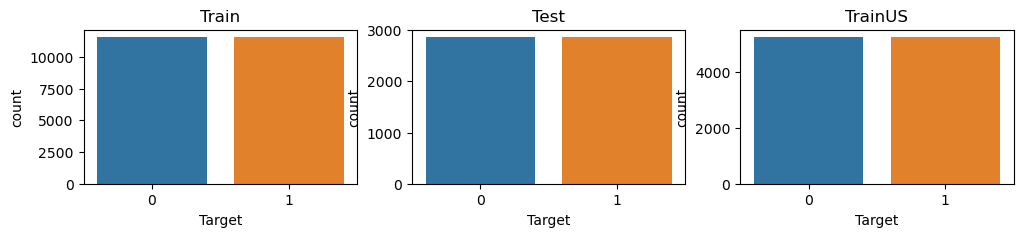

In [5]:
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X = list(dftr["Diff"]), y = list(dftr["Target"]))
X_test, y_test = rus.fit_resample(X = list(dftst["Diff"]), y = list(dftst["Target"]))
X_trainUS, y_trainUS = rus.fit_resample(X = list(dftrUS["Diff"]), y = list(dftrUS["Target"]))

fig, axs = plt.subplots(1,3, figsize=(12.0, 2.0))

ax = sns.countplot(x='Target', data=pd.DataFrame(y_train, columns = ['Target']), ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(), rotation=-0)
ax.set(title='Train')

ax2 = sns.countplot(x='Target', data=pd.DataFrame(y_test, columns = ['Target']), ax=axs[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=-0)
ax2.set(title='Test')

ax3 = sns.countplot(x='Target', data=pd.DataFrame(y_trainUS, columns = ['Target']), ax=axs[2])
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=-0)
ax3.set(title='TrainUS')


print("Total:",len(dftr.index)," Train:",len(y_train)," Test:",len(y_test))
print(len(X_train) == len(y_train), len(y_train))
dftr.head()

In [6]:
class evaluator:
    
    def __init__(self):
        self.dfResults = pd.DataFrame(columns=['DatasetName', 'ClassifierName', 'Measure', 'Value', 'Unit'])
        
    def modelComputeStats(self, model, X, y, datasetName, classifierName):
        results = pd.DataFrame(columns=['DatasetName', 'ClassifierName', 'Measure', 'Value', 'Unit'])
        y_pred = model.predict(X)
        measures = {'Accuracy': metrics.accuracy_score, 'F1': metrics.f1_score, 'Precision': metrics.precision_score, 'Recall': metrics.recall_score}
        for key in measures:
            value=0
            try:
                if(key=='Accuracy'):
                    value = round(measures[key](y, y_pred)*100, 2)            
                else:
                    value = round(measures[key](y, y_pred, average="macro")*100, 2)
                computed = {'DatasetName': datasetName, 'ClassifierName': classifierName, 'Measure': key, 'Value': value, 'Unit': '%'}
                results = pd.concat([results, pd.DataFrame(computed, index=[0])], ignore_index=True)
            except:
                print(key)
        return results

    def cvFit(self, estimator, params, classifierName, X_train, y_train, X_test, y_test):
        print(classifierName)
        m = sklearn.model_selection.cross_validate(estimator(**params), X=X_train, y=y_train,
                    scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc', 'r2'],
                    cv=5, verbose=1, n_jobs=os.cpu_count()-1, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=True)
        print(m.keys())
        print(len(m['estimator']))
        result = m['estimator'][np.argmax(m['test_precision'])]
        
        self.dfResults.drop(self.dfResults.index[self.dfResults['ClassifierName'] == classifierName], inplace = True)
        self.dfResults = pd.concat([self.dfResults, self.modelComputeStats(result, X_train, y_train, "Train", classifierName)], ignore_index=True) 
        self.dfResults = pd.concat([self.dfResults, self.modelComputeStats(result, X_test, y_test, "Test", classifierName)], ignore_index=True) 
        
        return result
evaluator=evaluator()

In [7]:
%%time
from sklearn.ensemble import RandomForestClassifier
#{'bootstrap': False, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
paramRFC = {'bootstrap': False, 'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}

classifierName = 'Random forest classifier'
rfc = evaluator.cvFit(RandomForestClassifier, paramRFC, classifierName, X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

Random forest classifier


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  2.6min finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName            ClassifierName    Measure  Value Unit
0       Train  Random forest classifier   Accuracy  95.89    %
1       Train  Random forest classifier         F1  95.89    %
2       Train  Random forest classifier  Precision  95.89    %
3       Train  Random forest classifier     Recall  95.89    %
4        Test  Random forest classifier   Accuracy  85.32    %
5        Test  Random forest classifier         F1  85.22    %
6        Test  Random forest classifier  Precision  86.28    %
7        Test  Random forest classifier     Recall  85.32    %

Wall time: 2min 36s


In [8]:
%%time
from sklearn.ensemble import GradientBoostingClassifier
#{'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 250}
paramGBC = {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 11, 'max_features': 'sqrt', 'n_estimators': 250}

classifierName = 'Gradient boosting classifier'
gbc = evaluator.cvFit(GradientBoostingClassifier, paramGBC, classifierName, X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

Gradient boosting classifier


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  3.9min finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName                ClassifierName    Measure  Value Unit
8        Train  Gradient boosting classifier   Accuracy  97.79    %
9        Train  Gradient boosting classifier         F1  97.79    %
10       Train  Gradient boosting classifier  Precision  97.82    %
11       Train  Gradient boosting classifier     Recall  97.79    %
12        Test  Gradient boosting classifier   Accuracy  86.91    %
13        Test  Gradient boosting classifier         F1  86.81    %
14        Test  Gradient boosting classifier  Precision  87.99    %
15        Test  Gradient boosting classifier     Recall  86.91    %

In [9]:
%%time
from sklearn import svm
# {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
paramSVMC = {'C': 100, 'gamma': 0.01, 'kernel': 'rbf', "probability": True}

classifierName = 'Support vector machine'
svmc = evaluator.cvFit(svm.SVC, paramSVMC, classifierName, X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

Support vector machine


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 14.8min finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName          ClassifierName    Measure  Value Unit
16       Train  Support vector machine   Accuracy  97.89    %
17       Train  Support vector machine         F1  97.89    %
18       Train  Support vector machine  Precision  97.92    %
19       Train  Support vector machine     Recall  97.89    %
20        Test  Support vector machine   Accuracy  92.72    %
21        Test  Support vector machine         F1  92.72    %
22        Test  Support vector machine  Precision  92.72    %
23        Test  Support vector machine     Recall  92.72    %

Wall time: 15min 38s


In [10]:
%%time
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, RationalQuadratic, WhiteKernel
paramGPC = {'kernel': 1**2 * Matern(length_scale=1, nu=1.5)}

classifierName = 'Gaussian process classifier'
gpc = evaluator.cvFit(GaussianProcessClassifier, paramGPC, classifierName, X_train = X_trainUS, y_train = y_trainUS, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

Gaussian process classifier


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 135.8min finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName               ClassifierName    Measure  Value Unit
24       Train  Gaussian process classifier   Accuracy  98.25    %
25       Train  Gaussian process classifier         F1  98.25    %
26       Train  Gaussian process classifier  Precision  98.26    %
27       Train  Gaussian process classifier     Recall  98.25    %
28        Test  Gaussian process classifier   Accuracy  90.50    %
29        Test  Gaussian process classifier         F1  90.50    %
30        Test  Gaussian process classifier  Precision  90.52    %
31        Test  Gaussian process classifier     Recall  90.50    %

Wall time: 2h 17min 22s


In [11]:
%%time
from sklearn.decomposition import PCA
pca = PCA(200).fit(X = X_train)
xtrainpca = pca.transform(X = X_train)
xtestpca = pca.transform(X = X_test)
print(len(xtrainpca), "out=", len(xtrainpca[500]), xtrainpca[500][0])
print(len(np.array(X_train)[0]), np.array(X_train).shape)

print(len(xtestpca), "out=", len(xtestpca[100]), xtestpca[100][0])
print(len(np.array(X_test)[0]), np.array(X_test).shape)

23108 out= 200 -1.219324065516441
300 (23108, 300)
5728 out= 200 4.077004766561307
300 (5728, 300)
Wall time: 11.3 s


In [12]:
%%time
from sklearn.neighbors import KNeighborsClassifier
# {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
paramKNN = {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

classifierName = 'K nearest neighbors'
knn = evaluator.cvFit(KNeighborsClassifier, paramKNN, classifierName, X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

K nearest neighbors


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   22.1s finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName       ClassifierName    Measure  Value Unit
32       Train  K nearest neighbors   Accuracy  95.32    %
33       Train  K nearest neighbors         F1  95.31    %
34       Train  K nearest neighbors  Precision  95.66    %
35       Train  K nearest neighbors     Recall  95.32    %
36        Test  K nearest neighbors   Accuracy  74.23    %
37        Test  K nearest neighbors         F1  72.61    %
38        Test  K nearest neighbors  Precision  81.73    %
39        Test  K nearest neighbors     Recall  74.23    %

Wall time: 50.2 s


In [13]:
%%time
from sklearn.neural_network import MLPClassifier
#{'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'max_iter': 500, 'random_state': 1, 'solver': 'lbfgs'}
paramMLPC = {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (256,), 'learning_rate': 'constant', 'max_iter': 500,
              'random_state': 1, 'solver': 'lbfgs'}

classifierName = 'Multi-layer perceptron'
mlpc = evaluator.cvFit(MLPClassifier, paramMLPC, classifierName, X_train = X_train, y_train = y_train, X_test=X_test, y_test = y_test)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

Multi-layer perceptron


[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  1.1min finished


dict_keys(['fit_time', 'score_time', 'estimator', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'test_roc_auc', 'test_r2'])
5


DatasetName          ClassifierName    Measure  Value Unit
40       Train  Multi-layer perceptron   Accuracy  91.74    %
41       Train  Multi-layer perceptron         F1  91.74    %
42       Train  Multi-layer perceptron  Precision  91.75    %
43       Train  Multi-layer perceptron     Recall  91.74    %
44        Test  Multi-layer perceptron   Accuracy  86.52    %
45        Test  Multi-layer perceptron         F1  86.51    %
46        Test  Multi-layer perceptron  Precision  86.63    %
47        Test  Multi-layer perceptron     Recall  86.52    %

Wall time: 1min 7s


In [15]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import LabelEncoder

classifierName = "Soft ensembling"
paramVC = {'estimators': [('rfc', rfc), ('gbc', gbc), ('gpc', gpc), ('svmc', svmc), ('mlpc', mlpc)], 'voting': 'soft'}
clf_list = [rfc, gbc, gpc, svmc, mlpc]
vcs = VotingClassifier(**paramVC)

vcs.estimators_ = clf_list
vcs.le_ = LabelEncoder().fit(y_trainUS)
vcs.classes_ = vcs.le_.classes_

# Now it will work without calling fit
evaluator.dfResults.drop(evaluator.dfResults.index[evaluator.dfResults['ClassifierName'] == classifierName], inplace = True)
evaluator.dfResults = pd.concat([evaluator.dfResults, evaluator.modelComputeStats(vcs, X_train, y_train, "Train", classifierName)], ignore_index=True) 
evaluator.dfResults = pd.concat([evaluator.dfResults, evaluator.modelComputeStats(vcs, X_test, y_test, "Test", classifierName)], ignore_index=True)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

DatasetName   ClassifierName    Measure  Value Unit
48       Train  Soft ensembling   Accuracy  98.45    %
49       Train  Soft ensembling         F1  98.45    %
50       Train  Soft ensembling  Precision  98.45    %
51       Train  Soft ensembling     Recall  98.45    %
52        Test  Soft ensembling   Accuracy  91.03    %
53        Test  Soft ensembling         F1  91.01    %
54        Test  Soft ensembling  Precision  91.34    %
55        Test  Soft ensembling     Recall  91.03    %

Wall time: 3min


In [16]:
classifierName = "Hard ensembling"
paramVC = {'estimators': [('rfc', rfc), ('gbc', gbc), ('gpc', gpc), ('svmc', svmc), ('mlpc', mlpc)], 'voting': 'hard'}
clf_list = [rfc, gbc, gpc, svmc, mlpc]
vch = VotingClassifier(**paramVC)

vch.estimators_ = clf_list
vch.le_ = LabelEncoder().fit(y_trainUS)
vch.classes_ = vch.le_.classes_

# Now it will work without calling fit
evaluator.dfResults.drop(evaluator.dfResults.index[evaluator.dfResults['ClassifierName'] == classifierName], inplace = True)
evaluator.dfResults = pd.concat([evaluator.dfResults, evaluator.modelComputeStats(vch, X_train, y_train, "Train", classifierName)], ignore_index=True) 
evaluator.dfResults = pd.concat([evaluator.dfResults, evaluator.modelComputeStats(vch, X_test, y_test, "Test", classifierName)], ignore_index=True)

display(evaluator.dfResults.loc[evaluator.dfResults['ClassifierName'] == classifierName])

DatasetName   ClassifierName    Measure  Value Unit
56       Train  Hard ensembling   Accuracy  97.77    %
57       Train  Hard ensembling         F1  97.77    %
58       Train  Hard ensembling  Precision  97.78    %
59       Train  Hard ensembling     Recall  97.77    %
60        Test  Hard ensembling   Accuracy  89.98    %
61        Test  Hard ensembling         F1  89.95    %
62        Test  Hard ensembling  Precision  90.43    %
63        Test  Hard ensembling     Recall  89.98    %

In [22]:
import joblib
classifiers = { 'RFC':rfc, 'GBC':gbc, 'GPC':gpc, 'SVMC':svmc, 'MLPC':mlpc, 'KNN':knn, 'VCH':vch, 'VCS':vcs }

for k in classifiers:
    print(k)
    with open('classifiers/'+k+'.joblib.pkl', 'wb') as f:
        joblib.dump(classifiers[k], f, compress=9)

RFC
GBC
GPC
SVMC
MLPC
KNN
VCH
VCS
